In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_excel("C:\\Users\\HP\\Desktop\\ducat training\\flight_price.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [10]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [12]:
df.drop('Date_of_Journey',axis = 1, inplace = True)

In [13]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [14]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [15]:
df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min'] = df['Arrival_Time'].str.split(':').str[1]

In [16]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [17]:
df.drop('Arrival_Time',axis = 1, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  object
 13  Arrival_min      10683 non-null  object
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [19]:
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_min'] = df['Arrival_min'].astype(int)

In [20]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Arrival_min      10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [22]:
df['Departure_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_min'] = df['Dep_Time'].str.split(':').str[1]

In [23]:
df['Departure_hour'] = df['Departure_hour'].astype(int)
df['Departure_min']= df['Departure_min'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Arrival_min      10683 non-null  int64 
 14  Departure_hour   10683 non-null  int64 
 15  Departure_min    10683 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.3+ MB


In [25]:
df.drop('Dep_Time',axis = 1, inplace = True)

In [26]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [28]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [29]:
df['Total_Stops'].mode()     #changimg the value


0    1 stop
Name: Total_Stops, dtype: object

In [30]:
#using map function to change the values

df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2,'3 stops':3, '4 stops':4, np.nan:1})

In [31]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [32]:
df.drop('Route', axis = 1, inplace = True)

In [33]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


In [34]:
df['Duration'].str.split(' ').str[0].str.split('h').str[0]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10683, dtype: object

In [35]:
df['Airline'].unique

<bound method Series.unique of 0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10683, dtype: object>

In [36]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [37]:
df['Additional_Info'].unique

<bound method Series.unique of 0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10683, dtype: object>

In [38]:
print(df['Price'].describe())


count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64


# Flight Price Distribution

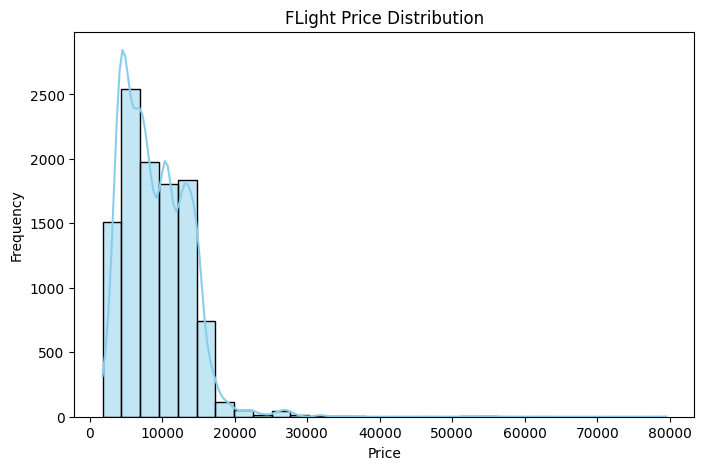

In [39]:
plt.figure(figsize =(8,5))
sns.histplot(df['Price'],bins=30,kde=True,color='skyblue')
plt.title('FLight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#The flight prices are right-skewed, with most fares concentrated between ₹5,000 and ₹15,000, indicating a few high-priced outliers.

# Average Flight price by Airline

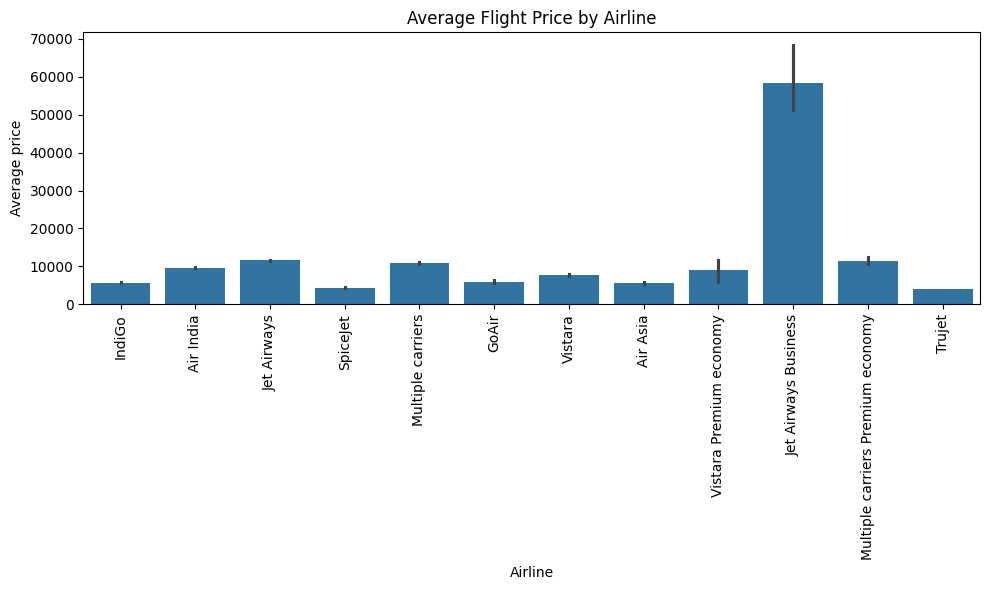

In [40]:
plt.figure(figsize =(10,6))
sns.barplot(x = 'Airline', y= 'Price', data = df , estimator= 'mean')
plt.xticks(rotation = 90)
plt.title('Average Flight Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average price')
plt.tight_layout()
plt.show()

#Jet Airways Business class significantly inflates the average flight price compared to all other airlines, highlighting the premium pricing of business services.

# Flight Price by number of stops

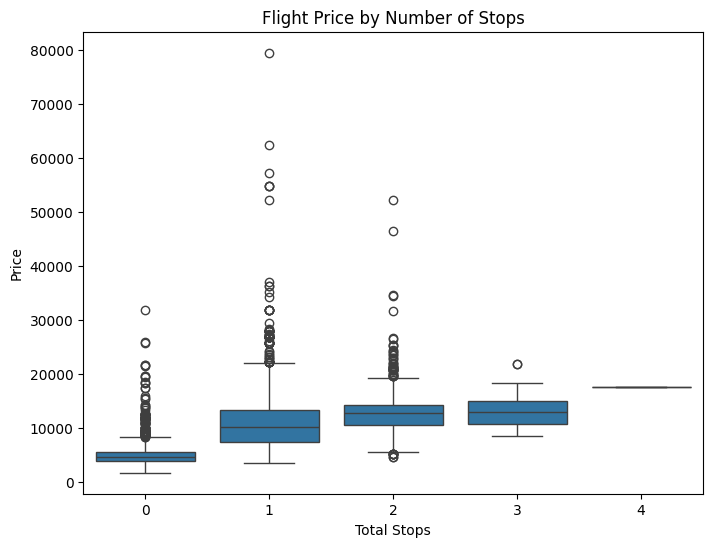

In [41]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Total_Stops', y = 'Price', data = df)
plt.title('Flight Price by Number of Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

#Flights with more stops generally have higher median prices, though zero-stop flights show the lowest price variability.


# Average flight price by source city

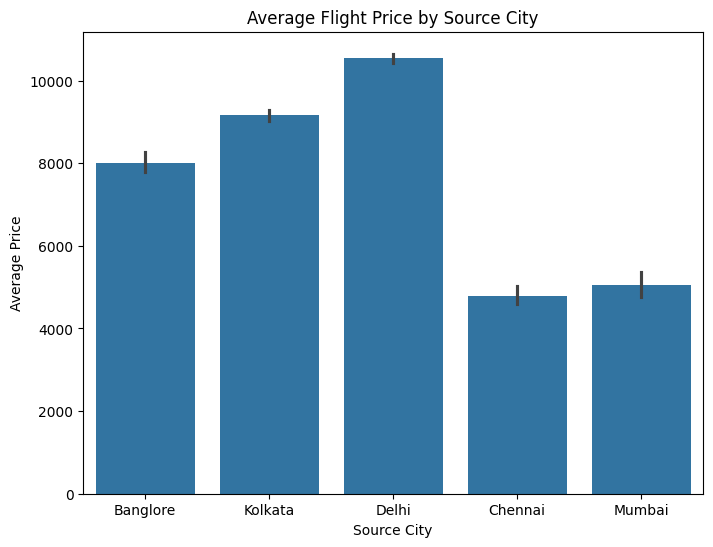

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(x='Source',y='Price', data = df, estimator = 'mean')
plt.title('Average Flight Price by Source City')
plt.xlabel('Source City')
plt.ylabel('Average Price')
plt.show()

#Delhi has the highest average flight price among source cities, while Chennai and Mumbai offer the most economical options.

In [45]:
print(df['Arrival_hour'].describe())
print("Skewness:", df['Arrival_hour'].skew())
print("Kurtosis:", df['Arrival_hour'].kurt())

count    10683.000000
mean        13.348778
std          6.859125
min          0.000000
25%          8.000000
50%         14.000000
75%         19.000000
max         23.000000
Name: Arrival_hour, dtype: float64
Skewness: -0.36998825315328315
Kurtosis: -1.0752021039693966


# Arrival Hour Distribution

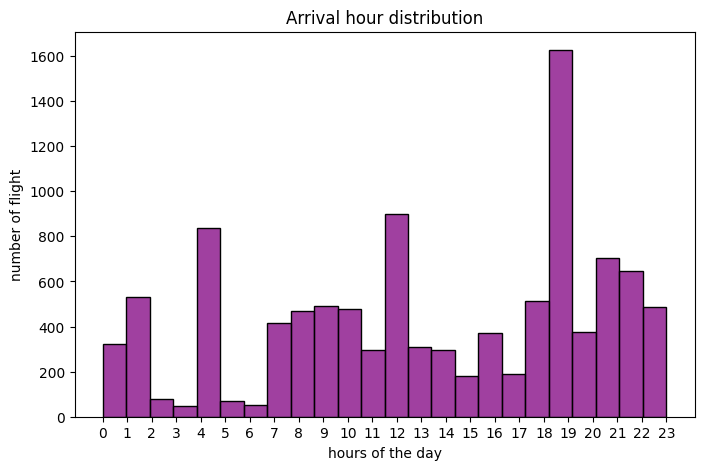

In [48]:
plt.figure(figsize = (8,5))
sns.histplot(df['Arrival_hour'], bins = 24, kde = False, color = 'Purple')
plt.title('Arrival hour distribution')
plt.xlabel('hours of the day')
plt.ylabel('number of flight')
plt.xticks(range(0,24))
plt.show()

#Most flights arrive around 18:00 hours, indicating peak arrival time, while early morning and mid-afternoon hours see significantly fewer arrivals.


# Flight Count by date of month 

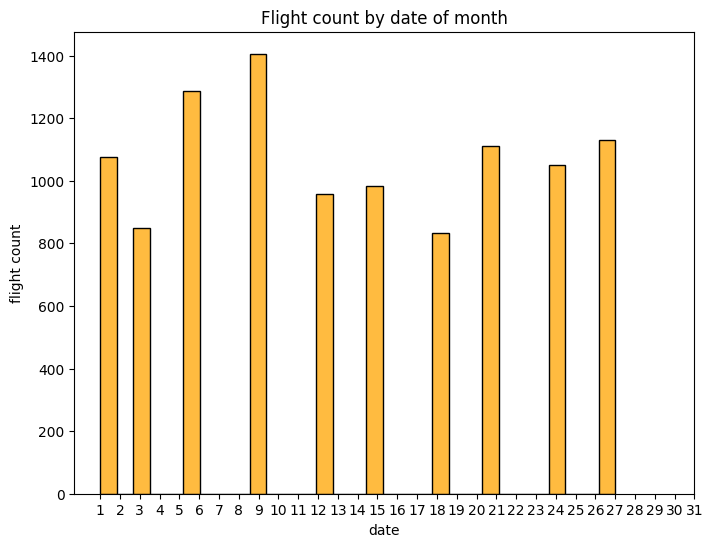

In [52]:
plt.figure(figsize = (8,6))
sns.histplot(df['Date'], bins = 31, kde = False, color = 'orange')
plt.title('Flight count by date of month')
plt.xlabel('date')
plt.ylabel('flight count')
plt.xticks(range(1,32))
plt.show()

#Flight counts are highest around the 7th to 9th of the month, with noticeable dips near the start and mid-month, suggesting uneven distribution of flights across dates.


# Flight count by month 

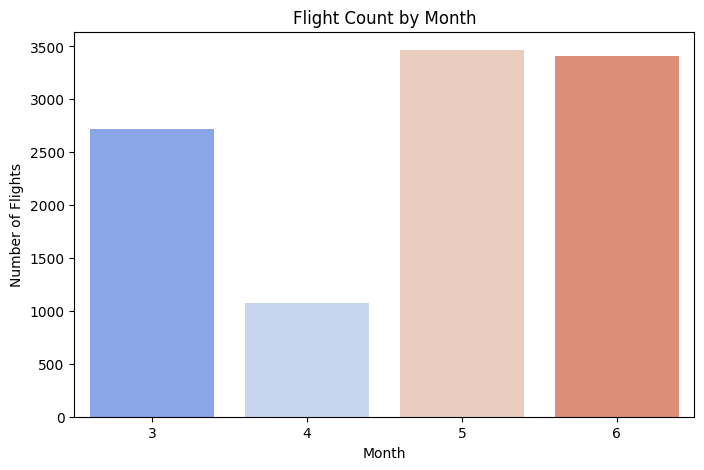

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Month', data = df, palette = 'coolwarm')
plt.title('Flight Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()

#Flight count peaked in May and June, while April saw the lowest number of flights, indicating possible seasonal or operational trends.


In [58]:
print(df['Year'].value_counts())

Year
2019    10683
Name: count, dtype: int64


# Monthly flight price trend

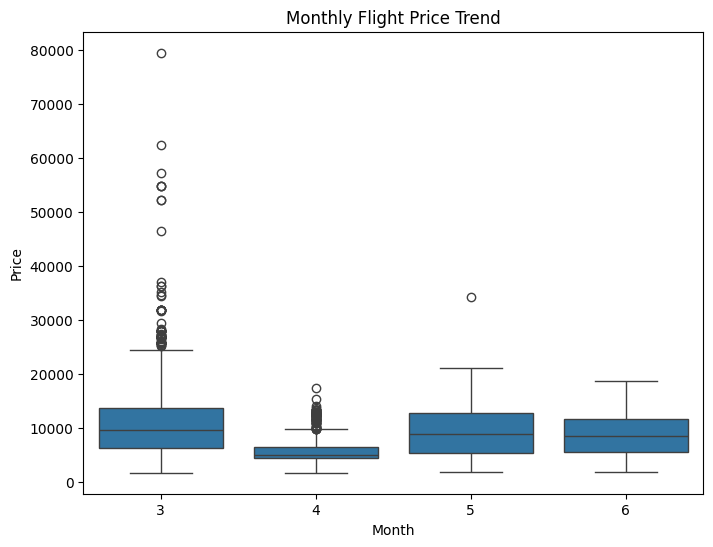

In [59]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Month', y='Price', data=df)
plt.title('Monthly Flight Price Trend')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

#Flight prices were highest and most variable in March, while April had the lowest and most consistent pricing across months.

# Flight Dataset Distribution Overview

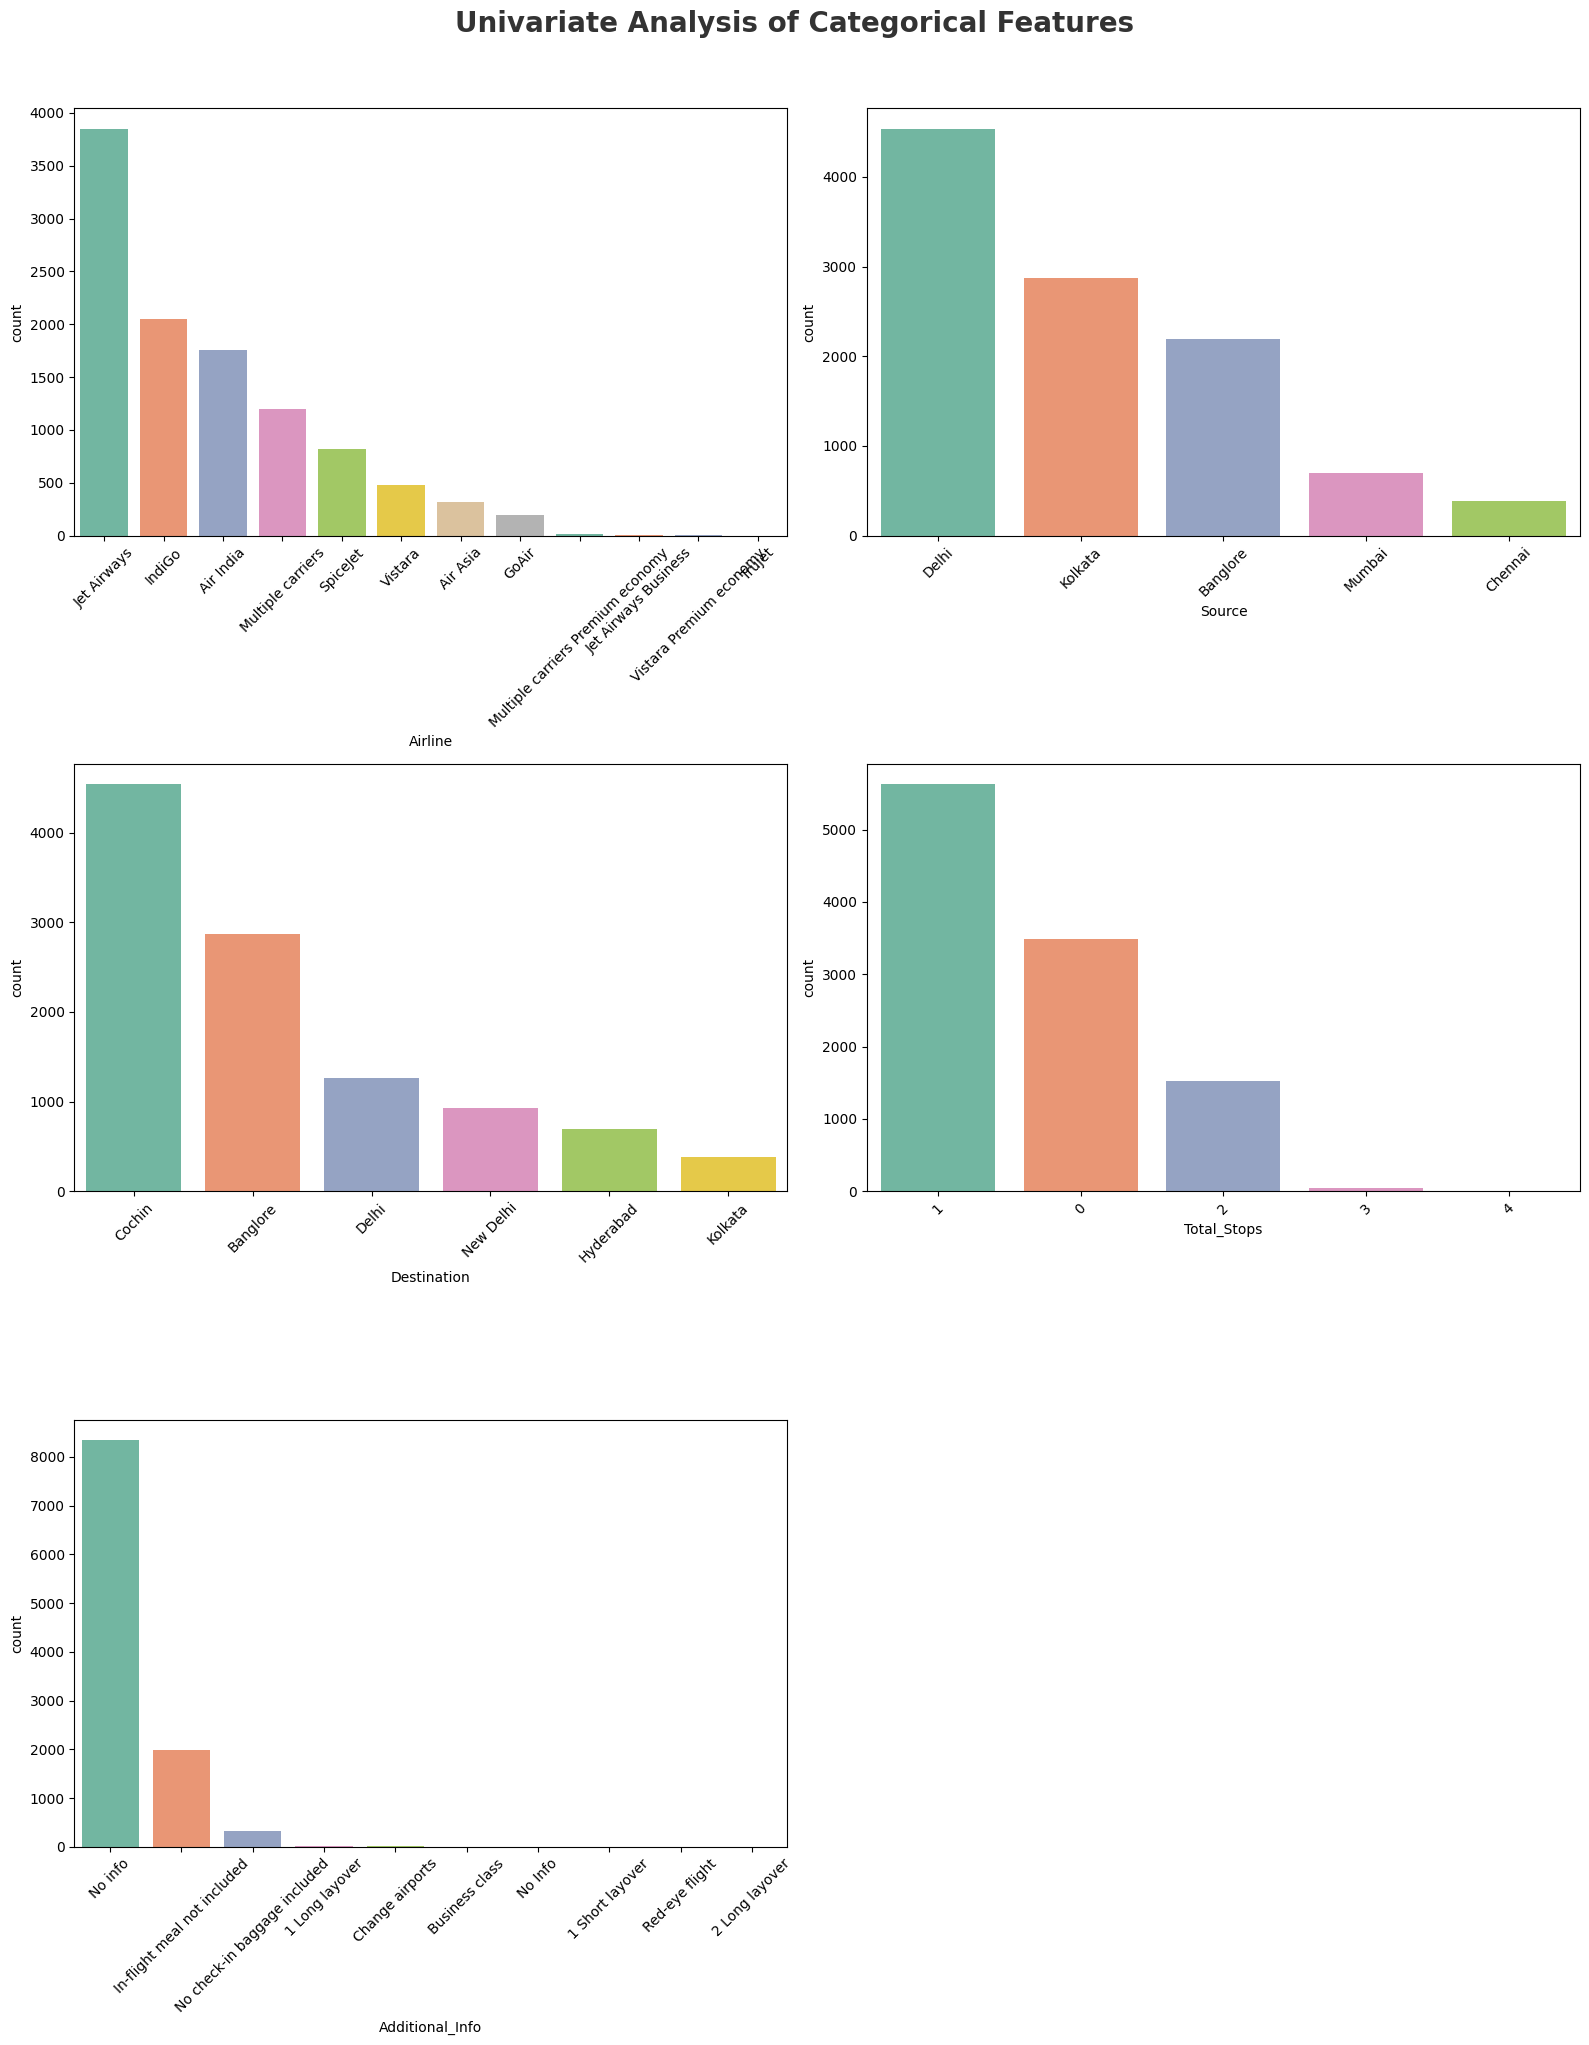

In [64]:
categorical_features = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

plt.figure(figsize=(16, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(len(categorical_features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[categorical_features[i]], order=df[categorical_features[i]].value_counts().index, palette='Set2')
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


#The visualizations show that Jet Airways operates the highest number of flights, with Delhi and Cochin being the busiest source and destination cities respectively. Most flights have one or no stops, indicating a preference for direct or semi-direct travel options.


# Flight Price Variation by Airline

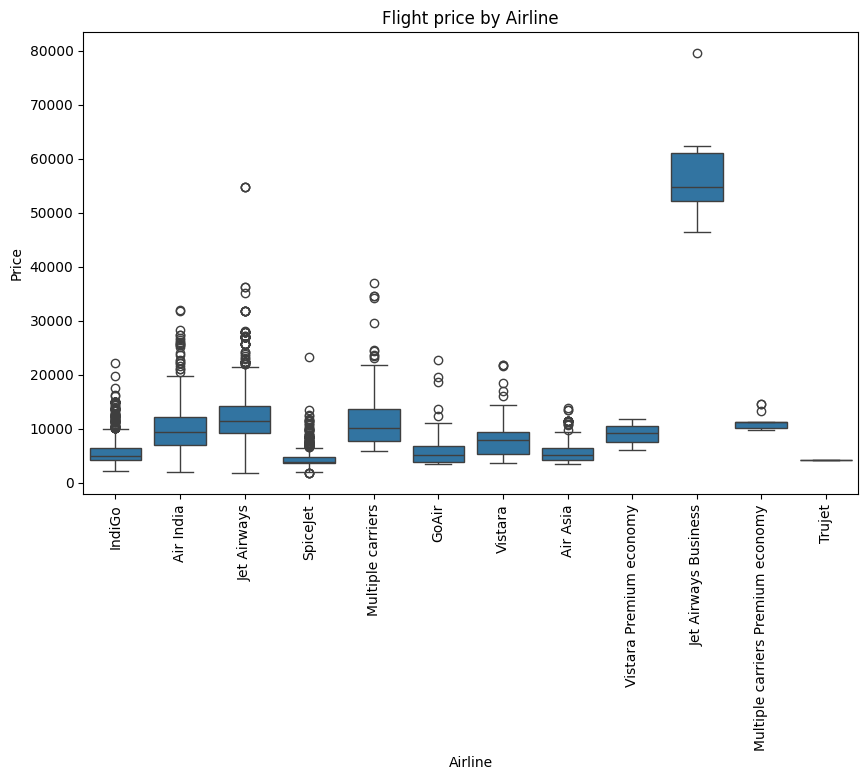

In [68]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Airline', y = 'Price', data = df)
plt.xticks (rotation = 90)
plt.title('Flight price by Airline')
plt.show()

#Jet Airways Business and Vistara Premium Economy show the highest flight prices, while Trujet offers the lowest, highlighting significant pricing differences across airline classes and carriers.

# Flight share by Airline

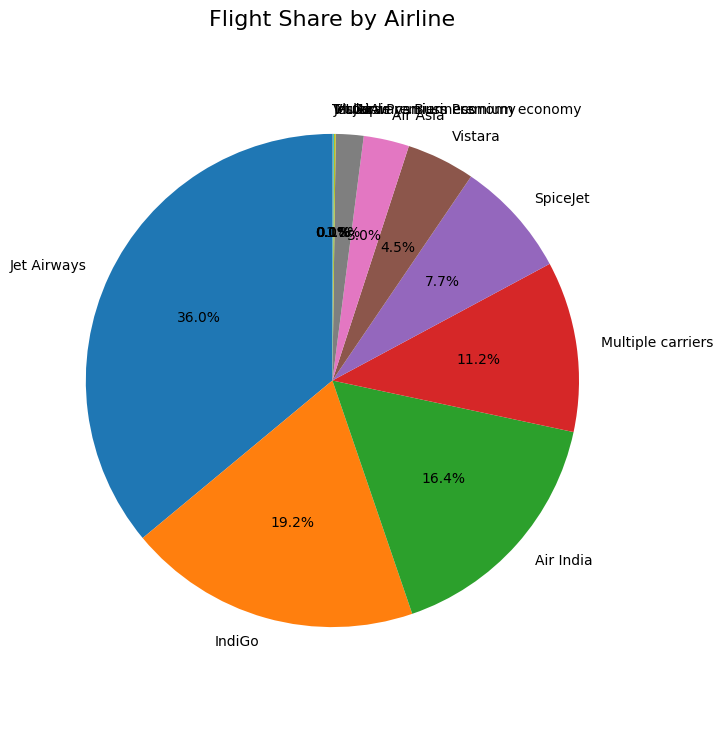

In [4]:
airline_count = df['Airline'].value_counts()
plt.figure( figsize = (7,9))
#plt.pie(airline_count, labels=airline_count.index, autopct='%1.1f%%', startangle=90)
plt.pie(airline_count, labels = airline_count.index,autopct='%1.1f%%', startangle=90)
plt.title('Flight Share by Airline', fontsize=16)
plt.axis('equal')
plt.show()

#Jet Airways holds the largest market share at 36%, followed by IndiGo and Air India, while premium and business classes have minimal representation in the flight distribution.

In [ ]:
""""
Conclusion: Flight Price Analysis Project
This project performed Exploratory Data Analysis (EDA) and Feature Engineering on Indian domestic flight data to uncover
trends in flight pricing. Key insights include:

Jet Airways and premium class tickets (like Jet Airways Business) significantly inflate average prices.

Flights with 1 or more stops are costlier than direct flights, while zero-stop flights are generally cheaper and more consistent.

Delhi emerges as the most expensive source city, while Chennai and Mumbai offer lower average fares.

The highest number of arrivals occurs at 6 PM, indicating peak landing hours.

Flight frequency varies throughout the month, peaking around the 7th to 9th, and is lowest in April,
potentially reflecting off-season travel.

March shows extreme pricing variation, while April is more price-stable, suggesting seasonal factors at play.

This analysis can support travel pricing strategies, customer decision-making, and predictive modeling for airfare trends.

""""